## HOUSING IN IRELAND

#### Loading Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import os
import re
from matplotlib.pyplot import figure

In [2]:
os.getcwd()

'c:\\Users\\leand\\OneDrive\\Documents\\GitHub\\IRELAND_HOUSING'

#### The data is sourced from propery price register.ie

In [3]:
data=pd.read_csv('Property_Price_Register_Ireland.csv')

In [4]:
data.shape

(476711, 9)

In [5]:
data.head()

,SALE_DATE,ADDRESS,POSTAL_CODE,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,PROPERTY_SIZE_DESC
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,0,1,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,438500.0,0,0,Second-Hand Dwelling house /Apartment,NaN
3,2010-01-04,"1 The Haven, Mornington",NaN,Meath,400000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
4,2010-01-04,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,0,0,Second-Hand Dwelling house /Apartment,NaN


In [6]:
data.dtypes

SALE_DATE              object
ADDRESS                object
POSTAL_CODE            object
COUNTY                 object
SALE_PRICE            float64
IF_MARKET_PRICE         int64
IF_VAT_EXCLUDED         int64
PROPERTY_DESC          object
PROPERTY_SIZE_DESC     object
dtype: object

#### Converting the date column to its proper datetime type

In [7]:
data['SALE_DATE']=pd.to_datetime(data['SALE_DATE'])
#data['SALE_PRICE']=pd.to_numeric(data['SALE_PRICE'])

In [8]:
data.dtypes

SALE_DATE             datetime64[ns]
ADDRESS                       object
POSTAL_CODE                   object
COUNTY                        object
SALE_PRICE                   float64
IF_MARKET_PRICE                int64
IF_VAT_EXCLUDED                int64
PROPERTY_DESC                 object
PROPERTY_SIZE_DESC            object
dtype: object

#### As post code and property description columns are mosly empty,ignore them

In [9]:
data.isnull().sum()

SALE_DATE                  0
ADDRESS                    0
POSTAL_CODE           386961
COUNTY                     0
SALE_PRICE                 0
IF_MARKET_PRICE            0
IF_VAT_EXCLUDED            0
PROPERTY_DESC              0
PROPERTY_SIZE_DESC    423922
dtype: int64

In [10]:
data=data.iloc[:,[0,1,3,4,5,6,7]]

#### Define functions to trim the address and property description to be more concise and readable.

In [11]:
TRIM_PROPERTY = lambda x: re.search(r"^([\S]+)", x).group()
TRIM_ADDRESS= lambda x: re.split(",", x)[-1]

In [12]:
data['PROPERTY_DESC']=data.iloc[:,6].apply(TRIM_PROPERTY)


In [13]:
data['ADDRESS']=data.iloc[:,1].apply(TRIM_ADDRESS)

#### Create a mortgage interest rate column,set to 1 for now

In [14]:
data['MORTGAGE_RATE']=1

In [15]:
data

,SALE_DATE,ADDRESS,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,MORTGAGE_RATE
0,2010-01-01,Co.Dublin,Dublin,343000.0,0,0,Second-Hand,1
1,2010-01-03,Portlaoise,Laois,185000.0,0,1,New,1
2,2010-01-04,Dublin 14,Dublin,438500.0,0,0,Second-Hand,1
3,2010-01-04,Mornington,Meath,400000.0,0,0,Second-Hand,1
4,2010-01-04,Kilkenny,Kilkenny,160000.0,0,0,Second-Hand,1
...,...,...,...,...,...,...,...,...
476706,2021-05-28,MULLINGAR,Westmeath,150000.0,0,0,Second-Hand,1
476707,2021-05-28,BORRIS,Carlow,170000.0,1,0,Second-Hand,1
476708,2021-05-28,WESTMEATH,Westmeath,175000.0,0,0,Second-Hand,1
476709,2021-05-28,GLENGARIFF,Cork,240000.0,0,0,Second-Hand,1


#### Mapping the year of sale to the average mortgage lending rate for tha year, mortgage rates have been obtained from the 

#### CENTRAL STATISTICS OFFICE IRELAND CSO.ie website

In [16]:
def map_interest_rate(year):
    mapping = {
        2010 : 4.02,
2011 : 4.42,
2012 : 4.33,
2013 : 4.38,
2014 : 4.20,
2015 : 4.05,
2016 : 3.61,
2017 : 3.44,
2018 : 3.21,
2019 : 3.02,
2020 : 2.92,
2021 : 2.62,
    }
    
    return mapping.get(year, "nothing")

In [17]:
data['MORTGAGE_RATE']=data['SALE_DATE'].dt.year.apply(map_interest_rate)

In [18]:
data

,SALE_DATE,ADDRESS,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,MORTGAGE_RATE
0,2010-01-01,Co.Dublin,Dublin,343000.0,0,0,Second-Hand,4.02
1,2010-01-03,Portlaoise,Laois,185000.0,0,1,New,4.02
2,2010-01-04,Dublin 14,Dublin,438500.0,0,0,Second-Hand,4.02
3,2010-01-04,Mornington,Meath,400000.0,0,0,Second-Hand,4.02
4,2010-01-04,Kilkenny,Kilkenny,160000.0,0,0,Second-Hand,4.02
...,...,...,...,...,...,...,...,...
476706,2021-05-28,MULLINGAR,Westmeath,150000.0,0,0,Second-Hand,2.62
476707,2021-05-28,BORRIS,Carlow,170000.0,1,0,Second-Hand,2.62
476708,2021-05-28,WESTMEATH,Westmeath,175000.0,0,0,Second-Hand,2.62
476709,2021-05-28,GLENGARIFF,Cork,240000.0,0,0,Second-Hand,2.62


#### Gathering additional variables like the median household income and deprivation rate for that year as these affect purchasing 

#### power, data gathered from CSO.IE

In [19]:
income_data=pd.read_csv('Income and Poverty Rates.csv')
income_data.head()


,Year,Median Real Household Disposable Income,Mean Real Household Disposable Income,Median Nominal Household Disposable Income,Mean Nominal Real Disposable Income,Median Equivalised Real Disposable Income,Mean Equivalised Real Disposable Income,Median Equivalised Nominal Disposable Income,Mean Equivalised Nominal Disposable Income,At Risk of Povery Rate,Deprivation Rate,Consistent Poverty Rate
0,2019,"46,255","55,660","47,373","57,005","26,005","29,613","26,634","30,329",7.3,10.3,1.8
1,2008,"45,233","52,973","45,401","53,170","22,347","26,067","22,430","26,164",11.4,8.6,2.3
2,2009,"42,093","50,078","42,093","50,078","22,397","25,400","22,397","25,400",10.1,9.5,2.5
3,2010,"41,262","49,388","39,801","47,640","21,418","25,085","20,660","24,197",11.5,14.8,3.4
4,2011,"40,711","47,598","39,819","46,555","21,159","24,276","20,695","23,744",10.6,17.2,3.8


In [20]:
income_data=income_data.loc[:,['Year','Median Real Household Disposable Income','Deprivation Rate']]



In [21]:
income_data.columns=['Year','Median income','Deprivation rate']

In [22]:
data['Year']=data['SALE_DATE'].dt.year
data['Month']=data['SALE_DATE'].dt.month_name()

In [23]:
data=data[data['Year']<2021]


#### Merging the two data frames to include median income and the deprivation rate

In [24]:
final_data=pd.merge(data, 
 income_data,
 how='inner',
 on='Year')

## FINAL DATA:

In [25]:
final_data=final_data[final_data['SALE_PRICE']<1000000]


In [26]:
final_data

,SALE_DATE,ADDRESS,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,MORTGAGE_RATE,Year,Month,Median income,Deprivation rate
0,2010-01-01,Co.Dublin,Dublin,343000.0,0,0,Second-Hand,4.02,2010,January,"41,262",14.8
1,2010-01-03,Portlaoise,Laois,185000.0,0,1,New,4.02,2010,January,"41,262",14.8
2,2010-01-04,Dublin 14,Dublin,438500.0,0,0,Second-Hand,4.02,2010,January,"41,262",14.8
3,2010-01-04,Mornington,Meath,400000.0,0,0,Second-Hand,4.02,2010,January,"41,262",14.8
4,2010-01-04,Kilkenny,Kilkenny,160000.0,0,0,Second-Hand,4.02,2010,January,"41,262",14.8
...,...,...,...,...,...,...,...,...,...,...,...,...
457785,2020-12-31,DUBLIN,Dublin,950000.0,0,0,Second-Hand,2.92,2020,December,"46,255",10.3
457786,2020-12-31,DUBLIN 14,Dublin,400000.0,0,0,Second-Hand,2.92,2020,December,"46,255",10.3
457787,2020-12-31,CO. MEATH,Meath,367000.0,0,0,Second-Hand,2.92,2020,December,"46,255",10.3
457789,2020-12-31,BARRACK ST,Roscommon,30000.0,0,0,Second-Hand,2.92,2020,December,"46,255",10.3


In [27]:
yearly_data=final_data.groupby(['Year','PROPERTY_DESC']).count().iloc[:,0:1].reset_index()

Number of new homes sold pales in comparison to second hand homes which would explain the increase i housig prices over the last 8-9 years.

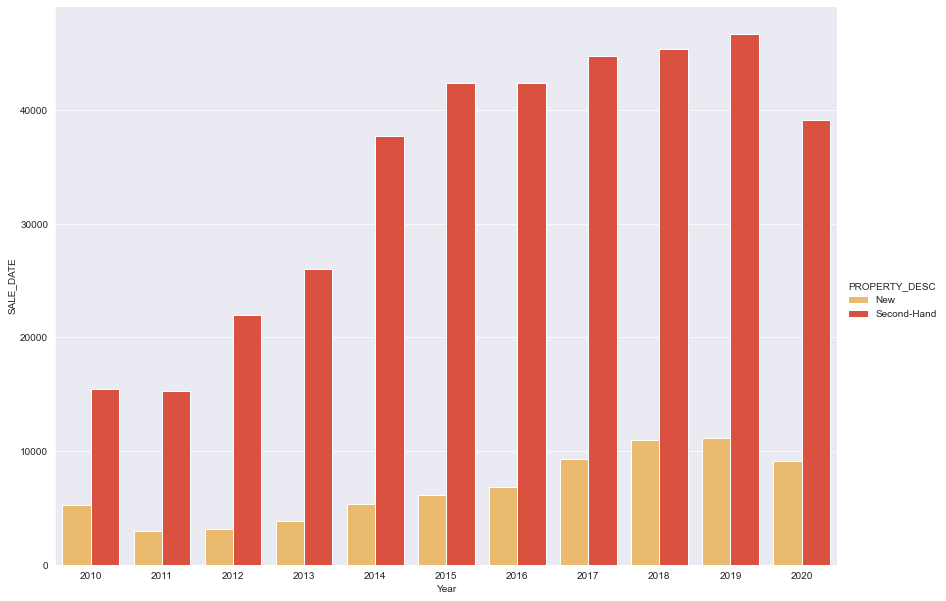

In [28]:
sns.catplot(data=yearly_data,x='Year',y='SALE_DATE',kind='bar',hue='PROPERTY_DESC',palette='YlOrRd',height=8.27,aspect=11.7/8.27)

During the period of increasing housing prices from 2012 onwards new homes sold for a higher amount compared to second hand homes on average.

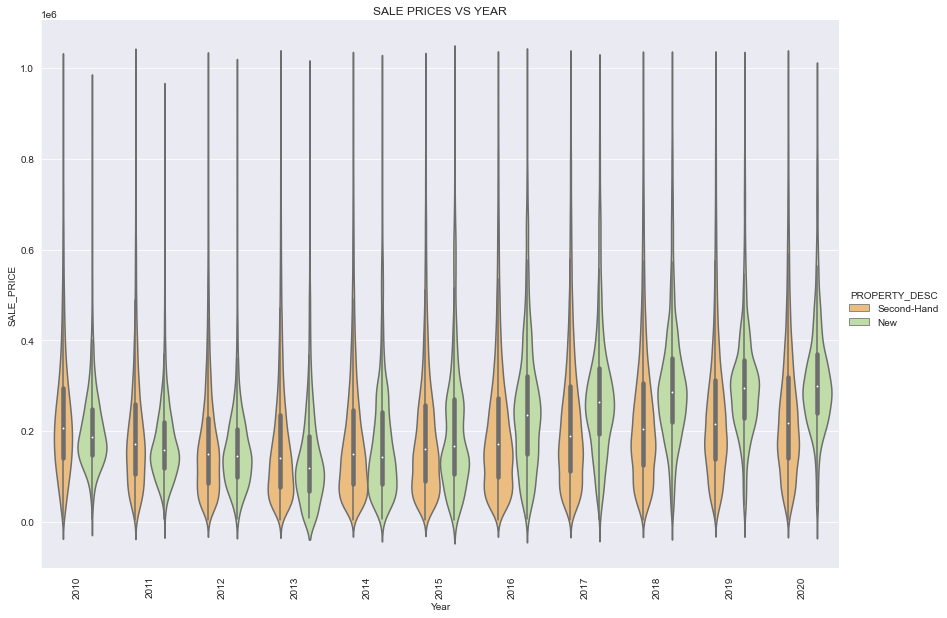

In [29]:

g=sns.catplot(x="Year", y="SALE_PRICE", kind="violin", data=final_data,palette='Spectral',hue='PROPERTY_DESC',height=8.27,aspect=11.7/8.27)

plt.title("SALE PRICES VS YEAR")
g.set_xticklabels(rotation=90)


C:\Users\leand\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'DISTRIBUTION OF SALE PRICES')

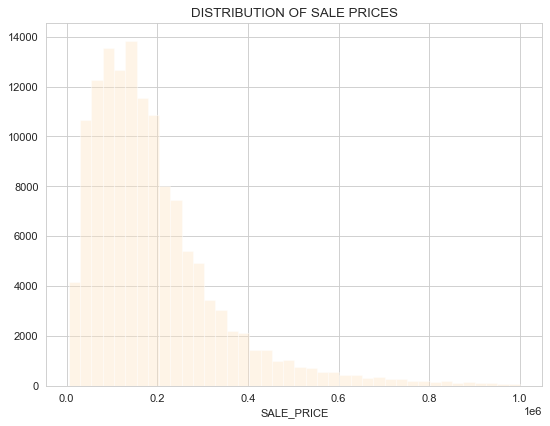

In [37]:
First_5_years=final_data[final_data['Year']<2015]
sns.set_palette("OrRd")
figure(figsize=(8, 6), dpi=80)
sns.distplot(First_5_years.SALE_PRICE,kde=False,bins=40)
plt.title("DISTRIBUTION OF SALE PRICES" )

C:\Users\leand\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'DISTRIBUTION OF SALE PRICES')

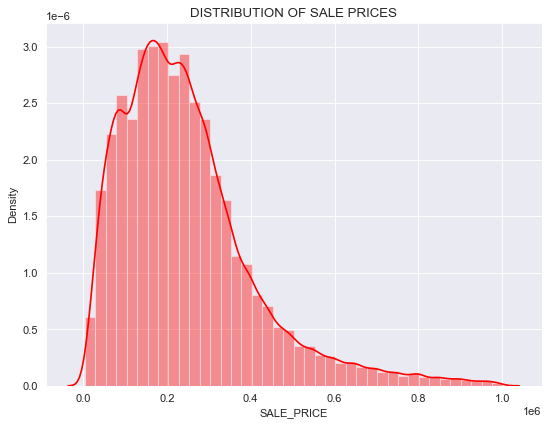

In [31]:
Last_5_years=final_data[final_data['Year']>2015]

figure(figsize=(8, 6), dpi=80)
sns.distplot(Last_5_years.SALE_PRICE,kde=True,bins=40,color='r')
plt.title("DISTRIBUTION OF SALE PRICES" )

An overwhelming majority of homes sold over market price whether new or second hand. This could indicate a lack of supply of new homes being constructed.

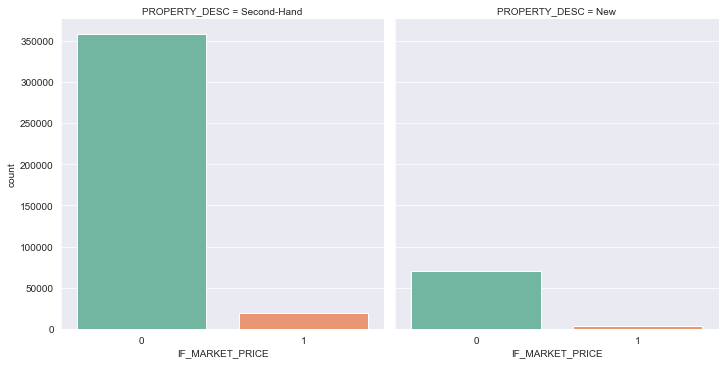

In [32]:
sns.catplot(data=final_data,x='IF_MARKET_PRICE',palette='Set2',col='PROPERTY_DESC',kind='count')

There is positive correlation between the deprivation rate and icrease in mortgage rates but it cant be said for sure that an icrease in mortgage payments causes unaffordability in other areas to o up.

<AxesSubplot:xlabel='MORTGAGE_RATE', ylabel='Deprivation rate'>

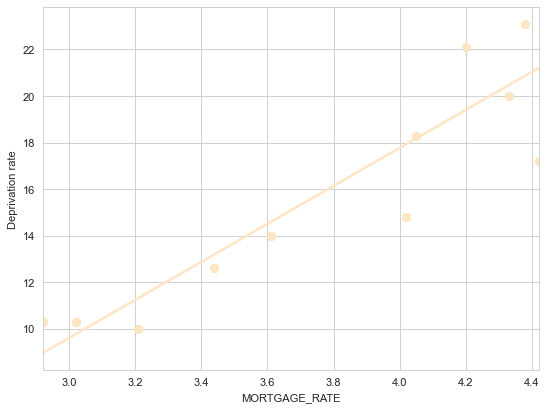

In [33]:
sns.set_style("whitegrid")
figure(figsize=(8, 6), dpi=80)
sns.regplot(y="Deprivation rate", x="MORTGAGE_RATE", data=final_data )

Text(0.5, 1.0, 'SALE PRICES VS PROPERTY')

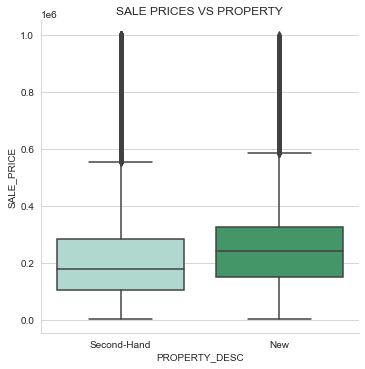

In [34]:

g=sns.catplot(x="PROPERTY_DESC", y="SALE_PRICE", kind="box", data=final_data,palette='BuGn')
plt.title("SALE PRICES VS PROPERTY")